In [1]:
# imports for RSA
from numpy import gcd, lcm, mean
from numpy.random import seed, randint
from scipy import special
from sympy import primerange, prime

import itertools
import time
import matplotlib.pyplot as plt

In [2]:
alphabet = [w for w in "ABCDEFGHIJKLMNOPQRSTUVWXYZ',.!?_ "]
encoding = range(0,33,1)

encoder = dict(zip(alphabet, encoding))
decoder = dict(zip(encoding, alphabet))

def charencode(decoded_text):
    
    encoded_text = []
    
    for letter in decoded_text:
        encoded_text.append(encoder.get(letter))
        
    return encoded_text

def chardecode(encoded_text):
    
    decoded_text = []
    
    for code in encoded_text:
        decoded_text.append(decoder.get(code))
        
    return decoded_text

def rsa(P, Q):
    N = P * Q # modulus <-- the hard number to crack!

    if N % 2 == 0:
        val = P if P % 2 == 0 else Q
        raise ValueError(f"{N} can not be divisible by 2.",
                         f"{P} and {Q} are incompatible with Shor's Algorithm.")

    # Euler's Totient
    L = (Q - 1) * (P - 1) # number of non-common factors (1, N)
    # Carmichael's Totient
    #L = lcm(Q-1, P-1)

    for E in range(2, L): # between [2, L)
        if gcd(L, E) * gcd(N, E) == 1: # coprime with both L and N
            break # E is public value

    D = 1
    while True:
        if D * E % L == 1 and D != E and D != N:
            break # D is private value
        D += 1

    return ((E, N), (D, N))

def decrypt(code, key):
    D, N = key
    
    code = [int(code[i:i+2]) for i in range(0,len(code),2)]
    
    dec = [d**D % N for d in code]
    
    dec = chardecode(dec)
    
    #return "".join(dec)
    return dec

def encrypt(text, key):
    E, N = key
    
    text = charencode(text)
    
    enc = [d**E % N for d in text]
    
    return "".join([f"{w:02}" for w in enc])

In [5]:
#Fix the (p,q) for the RSA
p = 5
q = 7

N = p*q
print(f"Modulus: {N}")

(E,N), (D,N) = rsa(p, q)

print(f"Public key: {(E,N)}")
print(f"Private key: {(D,N)}")

Modulus: 35
Public key: (11, 35)
Private key: (59, 35)


In [6]:
avg_timing = []

for j in range(1,800,1):
    
    timings = []
    
    
    for i in range(0,2,1):
        tic = time.perf_counter()
        decrypt(encrypt("A"*j, (E,N)), (D,N))
        toc = time.perf_counter()
        
        timings.append(toc - tic)

    avg_timing.append(mean(timings))

Text(0.5, 0, 'Letras')

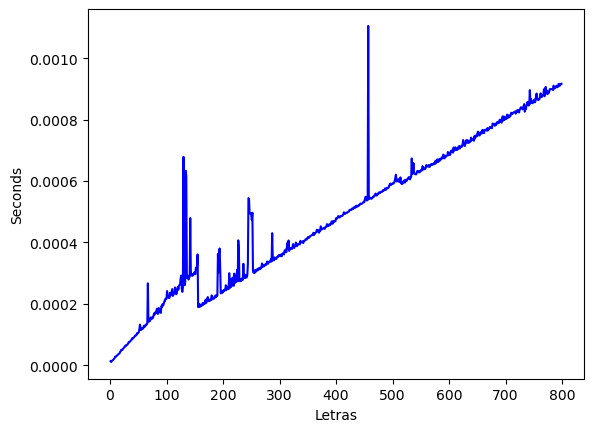

In [7]:
plt.plot(range(1,800,1), avg_timing, "b")
plt.ylabel("Seconds")
plt.xlabel("Letras")

In [32]:
#Fix Message and change N 
pmax = 1000
primes = list(primerange(3,pmax))
print(len(primes))

prime_pairs = list(itertools.combinations(primes[-1000:-1], 2))
print(len(prime_pairs))

167
13695


In [33]:
#Sort from the multiplication result
prime_pairs = sorted(prime_pairs, key=lambda e: e[0]*e[1])

In [34]:
#print(prime_pairs)

In [35]:
NN = []

for p,q in prime_pairs:
    if p*q % 2 == 0:
        pass
    else:
        NN.append(p*q)

NN.sort()

print(len(NN))

13695


In [46]:
avg_timing = []
rep = 2
Ndots = len(prime_pairs)//10

for (p,q) in prime_pairs[::Ndots]:
    
    timings = []

    (E,N), (D,N) = rsa(p, q)
    
    #print(f"{E} and {D}")
    
    for i in range(0,rep,1):
        enc= encrypt("BANCO DE PORTUGAL", (E,N))
        tic = time.perf_counter()
        decrypt(enc,(D,N))
        toc = time.perf_counter()
        
        timings.append(toc - tic)

    avg_timing.append(min(timings))

Text(0.5, 0, 'N')

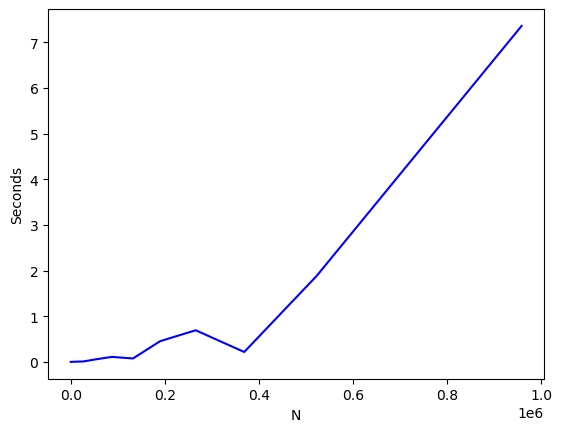

In [47]:
plt.plot(NN[::Ndots], avg_timing, "b")
plt.ylabel("Seconds")
plt.xlabel("N")

28.678381999999374

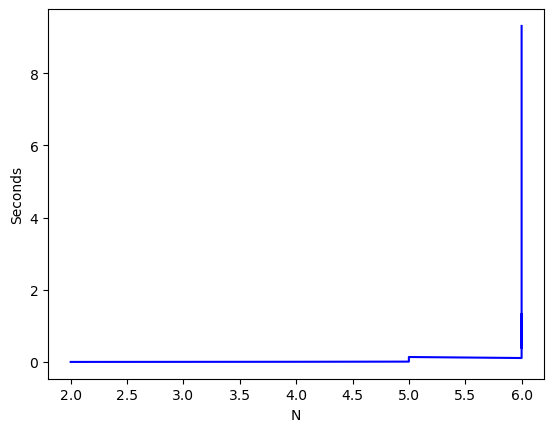

In [45]:
x = [len(str(n).encode()) for n in NN]
plt.plot(x[::Ndots], avg_timing, "b")
plt.ylabel("Seconds")
plt.xlabel("N")
sum(avg_timing)*rep